# Mini Project 3 - III. Word Prediction
Build a neural language model which is an alternative architecture to the n-gram model that you have seen in Lesson 02. The model predicts the next word given the $ N $ previous words. This is done by concatenating the word embeddings of $ N $ previous words and use them as input of a single hidden layer of size $ H $ with a non-linearity (e.g. sigmoid). Finally, a softmax layer is used to make a prediction of the next word. Train your model with $ N = 5 $ and $ H = 512 $ (you can also propose your own architecture).

In [1]:
import numpy as np
import tensorflow as tf
from khmernltk import word_tokenize
import utils

UNKNOWN_TOKEN = "<ចម>"

2025-02-03 15:43:14.912978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_word_to_index = '10_word_to_index.npy' # Change as you prefer

In [3]:
# Load word to index
word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
index_to_word = {v: k for k, v in word_to_index.items()}
vocabs = word_to_index.keys()

len(vocabs), word_to_index, index_to_word

(175,
 {'អង្គរវត្ត': 0,
  'ចូល': 1,
  'រចនាបថ': 2,
  'ដូចជា': 3,
  'តាម': 4,
  'ប៉ុន្តែ': 5,
  'ដូច': 6,
  'របស់': 7,
  'ចេញ': 8,
  'លើ': 9,
  'ថ្ងៃ': 10,
  'ផ្សេង': 11,
  'ទេសចរណ៍': 12,
  'ជុំវិញ': 13,
  'ខ្មែរ': 14,
  'លក្ខណៈ': 15,
  'ទឹក': 16,
  'នៃ': 17,
  'ផងដែរ': 18,
  'មាន': 19,
  'មកពី': 20,
  'ដី': 21,
  'ទាំងអស់': 22,
  'ដំបូល': 23,
  'ខាងជើង': 24,
  'ក្បាច់': 25,
  'ធំ': 26,
  'ខាងលិច': 27,
  'សំណង់': 28,
  'ពួក': 29,
  'វា': 30,
  '<ចម>': 31,
  'ជា': 32,
  'ទី២': 33,
  'ប្រវែង': 34,
  'សតវត្សរ៍': 35,
  'ដោយ': 36,
  'សតវត្ស': 37,
  'ខាង': 38,
  'ធ្វើ': 39,
  'សម្រាប់': 40,
  'សៀមរាប': 41,
  'ខាងត្បូង': 42,
  'ទី': 43,
  'ភាគ': 44,
  'ឈ្មោះ': 45,
  'បី': 46,
  'សំខាន់': 47,
  'អាច': 48,
  'វិញ': 49,
  'ទេវតា': 50,
  'ឡើង': 51,
  'មួយ': 52,
  'នូវ': 53,
  'ដើម': 54,
  'ពី': 55,
  'ខាងក្រៅ': 56,
  'ប្រើ': 57,
  'កណ្តាល': 58,
  'ខ្លះ': 59,
  'ដែរ': 60,
  'ព្រះបាទ': 61,
  'ចុង': 62,
  'ប្រហែល': 63,
  'ពិភពលោក': 64,
  'ប្រាសាទ': 65,
  'បន្ទាយស្រី': 66,
  'ស្រុក': 67,
  'បុរៈ': 68,

## Load Saved Embbedings

In [9]:
file_word_embeddings = 'word_to_embedding2.npy' # Change as you prefers

In [10]:
words_embedding = np.load(file_word_embeddings, allow_pickle=True).item()
words_embedding

{'ស្តេច': array([-0.38899854,  0.5195456 ,  0.24717951, -0.13901941,  0.5953962 ,
         0.06731475, -0.17536429,  0.43387717,  0.1559269 ,  0.28186244,
         0.39265808,  0.4006044 , -0.06004542,  0.06514528, -0.32450762,
         0.301309  ,  0.13176145,  0.32886714, -0.09396178,  0.18783791,
        -0.06258972, -0.13058354,  0.19328642,  0.02374979,  0.07081702,
         0.13415605, -0.15302472, -0.1356702 ,  0.2587851 ,  0.14796719,
        -0.42755112, -0.27526915,  0.54151875,  0.06565351,  0.02491657,
         0.33722448,  0.25662836,  0.32838696,  0.20777765,  0.04153182,
         0.18495157,  0.0261406 , -0.00138539,  0.08016974, -0.37224656,
         0.01174764,  0.27244475,  0.25955275, -0.20594905,  0.3362302 ],
       dtype=float32),
 'ប៉ុណ្ណោះ': array([-0.55120236,  0.19914359,  0.1490227 ,  0.25506303, -0.19525695,
         0.05558157,  0.01278762,  0.3916907 , -0.43010256,  0.2563458 ,
         0.2505921 ,  0.01301931,  0.13461435, -0.46949968, -0.01642346,
      

In [19]:
embeddings_array = utils.create_embedding_array(words_embedding, word_to_index)

## Prepare Dataset

In [11]:
# Read limited tokens
with open("cleaned_tokens.txt", "r") as f:
    cleaned_tokens = f.read().split()

In [12]:
len(cleaned_tokens), cleaned_tokens

(9086,
 ['ប្រាសាទ',
  'អង្គរវត្ត',
  'ឬ',
  'ប្រាសាទ',
  'អង្គរ',
  'តូច',
  'មាន',
  'ទីតាំង',
  'ស្ថិត',
  'នៅ',
  'ភាគ',
  'ខាងជើង',
  'នៃ',
  'ក្រុង',
  'សៀមរាប',
  'នៃ',
  'ខេត្ត',
  'សៀមរាប',
  'ប្រាសាទ',
  'អង្គរវត្ត',
  'ជា',
  'ប្រាសាទ',
  'ព្រហ្មញ្ញ',
  'សាសនា',
  'ធំ',
  'បំផុត',
  'និង',
  'ជា',
  'វិមាន',
  'សាសនា',
  'ដ៏',
  'ធំ',
  'បំផុត',
  'នៅក្នុង',
  'លោក',
  'ប្រាសាទ',
  'នេះ',
  'ត្រូវបាន',
  'កសាងឡើង',
  'ដោយ',
  'ព្រះបាទ',
  'សូរ្យ',
  'វរ្ម័ន',
  'ទី២',
  'ដែល',
  'ជា',
  'ស្នាដៃ',
  'ដ៏',
  'ធំ',
  'អស្ចារ្យ',
  'និង',
  'មាន',
  'ឈ្មោះ',
  'ល្បីល្បាញ',
  'រន្ទឺ',
  'សុះ',
  'សាយ',
  'ទៅ',
  'គ្រប់',
  'ទិសទី',
  'លើ',
  'ពិភពលោក',
  'ប្រាសាទ',
  'នេះ',
  'សាងសង់',
  'ឡើង',
  'នៅ',
  'ដើម',
  'សតវត្ស',
  'ទី',
  'ដែល',
  'ស្ថិត',
  'នៅក្នុង',
  'រាជធានី',
  'សោធរ',
  'បុរៈ',
  'ប្រាសាទ',
  'អង្គរវត្ត',
  'ជា',
  'ប្រាសាទ',
  'កសាងឡើង',
  'ដើម្បី',
  'ឧទ្ទិស',
  'ដល់',
  'ព្រះវិស្ណុ',
  'ប្រាសាទ',
  'នេះ',
  'ជា',
  'ប្រាសាទ',
  'ដែល',
  'នៅ',
  'គង់វង្ស',
  'ល

In [13]:
# Create training data
X = []
y = []
for i in range(len(cleaned_tokens) - utils.N):
    X.append(cleaned_tokens[i:i+utils.N])
    y.append(cleaned_tokens[i+utils.N])

X = np.array(X)
y = np.array(y)
X.shape, y.shape

((9081, 5), (9081,))

In [14]:
print(X[0], y[0])
print(X[1], y[1])

['ប្រាសាទ' 'អង្គរវត្ត' 'ឬ' 'ប្រាសាទ' 'អង្គរ'] តូច
['អង្គរវត្ត' 'ឬ' 'ប្រាសាទ' 'អង្គរ' 'តូច'] មាន


In [15]:
UNKNOWN_INDEX = word_to_index[utils.UNKNOWN_TOKEN]
UNKNOWN_INDEX

92

In [16]:
# Convert words to indices. 
X_indices = []
y_indices = []
for i in range(len(X)):
    X_indices.append([word_to_index[w] if w in vocabs else word_to_index[utils.UNKNOWN_TOKEN] for w in X[i]])
    y_indices.append(word_to_index[y[i]] if y[i] in vocabs else word_to_index[utils.UNKNOWN_TOKEN])

X_indices = np.array(X_indices)
y_indices = np.array(y_indices)
X_indices.shape, y_indices.shape

((9081, 5), (9081,))

In [17]:
X_indices[0], y_indices[0], X[0], y[0]

(array([176, 564,  62, 176, 535]),
 678,
 array(['ប្រាសាទ', 'អង្គរវត្ត', 'ឬ', 'ប្រាសាទ', 'អង្គរ'], dtype='<U20'),
 'តូច')

## Neural Network Model 1 - Simple

In [20]:
print(embeddings_array.shape[0], embeddings_array.shape[1])

940 50


In [21]:
def create_word_prediction_model1(embeddings_array, input_length=5, hidden_size=512):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=embeddings_array.shape[0], output_dim=embeddings_array.shape[1], weights=[embeddings_array], input_length=input_length, trainable=False))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(hidden_size, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(len(vocabs), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model = create_word_prediction_model1(embeddings_array, utils.N, utils.H)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 50)             47000     
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 512)               128512    
                                                                 
 dense_1 (Dense)             (None, 940)               482220    
                                                                 
Total params: 657732 (2.51 MB)
Trainable params: 610732 (2.33 MB)
Non-trainable params: 47000 (183.59 KB)
_________________________________________________________________


In [23]:
model.fit(X_indices, y_indices, epochs=150, batch_size=128)

Epoch 1/150
71/71 [==============================] - 1s 11ms/step - loss: 5.9329 - accuracy: 0.1110
Epoch 2/150
71/71 [==============================] - 1s 9ms/step - loss: 5.6671 - accuracy: 0.1269
Epoch 3/150
71/71 [==============================] - 1s 8ms/step - loss: 5.6124 - accuracy: 0.1269
Epoch 4/150
71/71 [==============================] - 1s 8ms/step - loss: 5.5522 - accuracy: 0.1272
Epoch 5/150
71/71 [==============================] - 1s 9ms/step - loss: 5.4813 - accuracy: 0.1277
Epoch 6/150
71/71 [==============================] - 1s 12ms/step - loss: 5.4007 - accuracy: 0.1288
Epoch 7/150
71/71 [==============================] - 1s 8ms/step - loss: 5.3042 - accuracy: 0.1331
Epoch 8/150
71/71 [==============================] - 1s 9ms/step - loss: 5.1882 - accuracy: 0.1383
Epoch 9/150
71/71 [==============================] - 1s 9ms/step - loss: 5.0630 - accuracy: 0.1481
Epoch 10/150
71/71 [==============================] - 1s 9ms/step - loss: 4.9358 - accuracy: 0.1577
Epoch 1

Model's accuracy: 98.93%

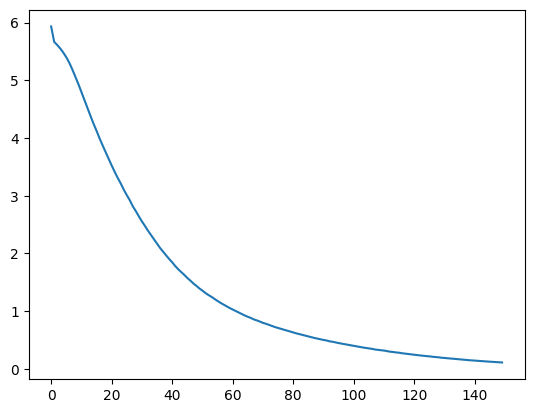

In [24]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.show()

In [25]:
# Save model
model.save("pre_model_word_prediction1.keras")

In [26]:
word = "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់"
utils.predict_next_word(model, word, word_to_index, index_to_word, vocabs, UNKNOWN_)

| 2025-01-30 14:43:04,628 | INFO | khmer-nltk | Loaded model from /Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/khmernltk/word_tokenize/sklearn_crf_ner_10000.sav |


1/1 [==============================] - 0s 92ms/step


'ដោយសារ'

In [27]:
text = utils.generate_text(model, "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់", word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 22ms/step


In [28]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដោយសារភាពសម្បើមនិងរុងរឿងនៃស្ថាបត្យកម្មនេះចម្លាក់ដែលលាតសន្ធឹងនិងដោយសារស្ថាបត្យកម្មខ្មែរមានរូបអប្សរានិងទេវតាដែលឆ្លាក់នៅលើជញ្ជាំងប្រាសាទពាក្យថាអង្គរតាមវចនានុក្រមរបស់គឺប្រាសាទអង្គរធំមានដែលគេយកមកមានក្បាច់ដែលតំណាងឲ្យពិភពលោកប្រាង្គកណ្តាលតំណាងឲ្យភ្នំព្រះសុមេរុដែលស្ថិតនៅកណ្តាលពិភពលោកប្រាង្គនៅតំណាងឲ្យកំពូលភ្នំព្រះសុមេរុដែលជាទីលំនៅរបស់អាទិទេពនិងទេវតាក្នុងទេវកថាហិណ្ឌូដែលមានកសិ្សណឬគូទឹកព័ទ្ធជុំវិញប្រហែលជាដែលចំណែកកសិ្សណប្រាសាទរបស់ឈ្មោះមានបណ្តោយប្រវែងម៉ែត្រទទឹងដែលលើម៉ែត្រផ្លូវធំដើរចូល


## Model 2 - LSTM

In [18]:
def create_model_2(embeddings_array, input_length=5, hidden_size=512):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=embeddings_array.shape[0], output_dim=embeddings_array.shape[1], weights=[embeddings_array], input_length=input_length, trainable=False))
    model.add(tf.keras.layers.LSTM(hidden_size))
    model.add(tf.keras.layers.Dense(len(vocabs), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [19]:
model2 = create_model_2(embeddings_array, utils.N, utils.H)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 50)             47000     
                                                                 
 lstm (LSTM)                 (None, 512)               1153024   
                                                                 
 dense (Dense)               (None, 940)               482220    
                                                                 
Total params: 1682244 (6.42 MB)
Trainable params: 1635244 (6.24 MB)
Non-trainable params: 47000 (183.59 KB)
_________________________________________________________________


In [20]:
model2.fit(X_indices, y_indices, epochs=100, batch_size=128)

Epoch 1/100
71/71 [==============================] - 6s 57ms/step - loss: 5.8994 - accuracy: 0.1245
Epoch 2/100
71/71 [==============================] - 4s 58ms/step - loss: 5.5986 - accuracy: 0.1267
Epoch 3/100
71/71 [==============================] - 4s 59ms/step - loss: 5.3880 - accuracy: 0.1269
Epoch 4/100
71/71 [==============================] - 4s 60ms/step - loss: 5.1101 - accuracy: 0.1267
Epoch 5/100
71/71 [==============================] - 4s 59ms/step - loss: 4.8217 - accuracy: 0.1271
Epoch 6/100
71/71 [==============================] - 4s 62ms/step - loss: 4.5474 - accuracy: 0.1341
Epoch 7/100
71/71 [==============================] - 4s 59ms/step - loss: 4.2933 - accuracy: 0.1369
Epoch 8/100
71/71 [==============================] - 4s 59ms/step - loss: 4.0351 - accuracy: 0.1516
Epoch 9/100
71/71 [==============================] - 5s 64ms/step - loss: 3.7770 - accuracy: 0.1633
Epoch 10/100
71/71 [==============================] - 5s 66ms/step - loss: 3.5238 - accuracy: 0.1917

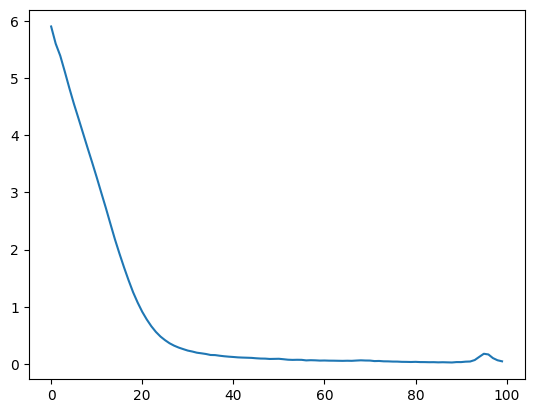

In [21]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(model2.history.history['loss'])
plt.show()

In [22]:
# Save model
model2.save("model_word_prediction2.keras")

In [23]:
word = "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់"
utils.predict_next_word(model2, word, word_to_index, index_to_word, vocabs)

| 2025-01-29 22:48:28,763 | INFO | khmer-nltk | Loaded model from /Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/khmernltk/word_tokenize/sklearn_crf_ner_10000.sav |


1/1 [==============================] - 1s 530ms/step


'ដោយ'

In [25]:
text = utils.generate_text(model2, "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់", word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 27ms/step


In [26]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដោយតាមសម្បើមនិងនៃសៀមរាបសរុបដូចគ្នាខេត្តដែលនៃនោះនៅអង្គរវត្តនេះត្រូវបានលិចជាមួយទៅនៅលោកមូហ៊តនេះបានអ្នកទេសចរណ៍លោកប្រជាជនដ៏ពួកនេះប្រទេសនៅខេត្តបានដែលឈ្មោះថាអង្គរវត្តបរមព្រះមហាប៉ុន្តែសម្រាប់ឥន្រ្ទបញ្ចប់ជាសម្រាប់គឺអង្គរវត្តចុងក្រោយរបស់ពិភពលោកអង្គរវត្តគឺឲ្យកំពូលក្នុងប្រាង្គគោដែលមានខុសគ្នាហើយនិងប្រាង្គខាងលើត្រូវបានមានហើយជាមួយគោបុរៈនានាជានៅថែវដែលបីថែវខាងក្នុងមានទៅថែវនៅកាច់ជ្រុងដែលមានថែវគេនូវភ្ជាប់ដែលក្បាច់ថែវខាងក្រៅទៅកាន់ខាងលិចទីនៃជិតលើ


## Load Model and Test

In [15]:
file_model = 'model_word_prediction2.keras'
model = tf.keras.models.load_model(file_model)
text = generate_text(model, "ប្រាសាទអង្គរវត្តត្រូវបានគេដែល", word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 25ms/step


In [16]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេដែលប៉ុន្តែធំសតវត្សរ៍ប៉ុន្តែស្ថិតត្រូវបានប៉ុន្តែព្រះបាទស្រុកនូវប៉ុន្តែលោកសំណង់ប៉ុន្តែធ្វើដើមប៉ុន្តែសំណង់ខាងក្នុងនគរប៉ុន្តែសំណង់ម៉ែត្រប៉ុន្តែខាងកើតសំណង់ប៉ុន្តែផ្នែកកម្ពុជាប្រទេសប៉ុន្តែបំផុតដ៏ប៉ុន្តែនៅក្នុងនូវប៉ុន្តែទៀតនគរប៉ុន្តែរួមនូវប៉ុន្តែមិនបំផុតប៉ុន្តែធ្វើព្រះវិស្ណុប៉ុន្តែទៀតសតវត្សរ៍ប៉ុន្តែវានូវប៉ុន្តែសំខាន់ខាងក្នុងសំណង់ប៉ុន្តែផ្នែកដើមប៉ុន្តែសំណង់ខាងក្នុងអ្នកប៉ុន្តែសំណង់ម៉ែត្រប៉ុន្តែធ្វើភាគប៉ុន្តែសំណង់ភាគប៉ុន្តែយ៉ាងគ្នាប៉ុន្តែភាគខាងត្បូងចំពោះនគរដូចជាឬធ្វើរចនាបថអំពីប៉ុន្តែគោអំពីប៉ុន្តែគោអំពីចំពោះនគរប៉ុន្តែភាគប្រជាជនប៉ុន្តែនោះ
